In [1]:
from os import listdir
import numpy as np
from matplotlib import image
import cv2
# load all images in a directory
loaded_images = list()
# On suppose que la base d'images est dans le dossier "obj_decoys" sur votre Google Drive
# Il faut charger Drive dans Colab

path='C:/Users/admin/Desktop/midvi s3/Image mining/obj_decoys'
for filename in listdir(path):
	# load image
	img_data = image.imread(path+'/' + filename)
	# store loaded image
	loaded_images.append(img_data)
	# Activer l'instruction ci-dessus pour afficher les nom de images et les tailles
  # print(' %s %s ' % (filename, img_data.shape))

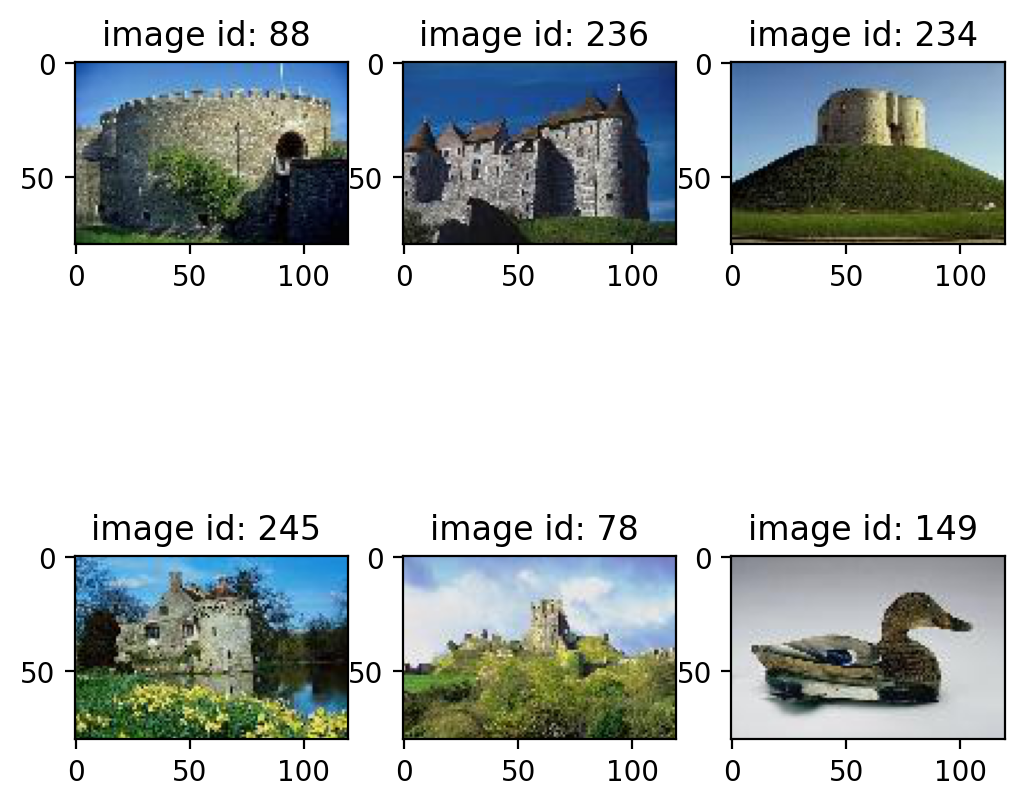

In [2]:
# Afficher les 6 premières images
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 6), dpi=200)
import random
id=random.sample(range(270), 6)
for i in range(6):
    ax1 = fig.add_subplot(2, 3, i+1)
    ax1.imshow(loaded_images[id[i]])
    ax1.set_title('image id: %s '% (id[i]))

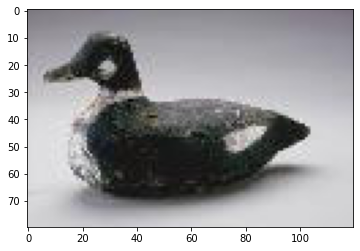

In [3]:
img_requete = image.imread('C:/Users/admin/Desktop/midvi s3/Image mining/img.jpg')
plt.imshow(img_requete)

In [50]:
def CBIR_Indexation(loaded_images):
    features=np.zeros((1,32))
    listFeatures=list()
    for i in range (len(loaded_images)):
        loaded = cv2.cvtColor(loaded_images[i], cv2.COLOR_BGR2HSV)
        hist = cv2.calcHist(loaded,[0,1,2],None,[8,2,2],[0,180,0,256,0,256])
        hist = cv2.normalize(hist,None).flatten()
        listFeatures.append(hist)
    return listFeatures

In [52]:
features = CBIR_Indexation(loaded_images)
len(features)

270

In [34]:
Imreq = cv2.cvtColor(img_requete, cv2.COLOR_BGR2HSV)
imreq = cv2.calcHist([Imreq],[0,1,2],None,[8,2,2],[0,180,0,256,0,256]).flatten()

In [27]:
index_Matrix=CBIR_Indexation(loaded_images)
# Afficher la taille de la matrice de caractéristiques et qui doit étre de taille égale à Nombre d'images dans la base multiplié par nombre de caractéristiques
print (index_Matrix.shape)
print(index_Matrix)

(270, 32)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00847366 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [35]:

import scipy.spatial.distance as dist

def CBIR_Recherche(Imreq,ind_Matrix,loaded_images):
    distances = {}
    for i in range(len(loaded_images)):
       
        distances[i]=dist.euclidean(Imreq,ind_Matrix[i])
        
        distance=dict(sorted(distances.items(),key=lambda x: x[1]))
    return distance

In [36]:
print(imreq)

distanes_CBIR=CBIR_Recherche(imreq,index_Matrix,loaded_images)

[5.720e+02 2.380e+03 0.000e+00 0.000e+00 1.640e+02 1.900e+01 2.000e+00
 0.000e+00 4.970e+02 4.000e+01 7.000e+00 0.000e+00 5.380e+02 5.700e+01
 2.000e+00 0.000e+00 7.210e+02 2.170e+02 4.000e+00 0.000e+00 7.100e+01
 1.070e+02 1.000e+00 0.000e+00 1.200e+02 1.710e+02 0.000e+00 0.000e+00
 1.080e+02 3.802e+03 0.000e+00 0.000e+00]


In [37]:
distanes_CBIR

{71: 4653.208105144698,
 163: 4653.273789473881,
 155: 4653.274211735364,
 178: 4653.274339756671,
 185: 4653.274482123897,
 196: 4653.275596330424,
 153: 4653.276720374426,
 154: 4653.277692688561,
 180: 4653.277873545228,
 136: 4653.278267622151,
 201: 4653.279528439843,
 160: 4653.2831224705,
 138: 4653.284411583287,
 198: 4653.285257019102,
 184: 4653.28638324697,
 175: 4653.287814452772,
 68: 4653.289767133351,
 183: 4653.304563855287,
 50: 4653.30463414308,
 169: 4653.310955769089,
 48: 4653.314463822759,
 173: 4653.3151639969765,
 174: 4653.3151639969765,
 165: 4653.3155079224325,
 45: 4653.317269311604,
 86: 4653.32225551402,
 139: 4653.326529882754,
 5: 4653.328591929798,
 145: 4653.329679096026,
 206: 4653.3307561521,
 195: 4653.33100357649,
 168: 4653.332391828341,
 164: 4653.337863255542,
 146: 4653.341676085224,
 189: 4653.341676085224,
 210: 4653.342993233641,
 200: 4653.343702214762,
 179: 4653.3468689895035,
 148: 4653.348134478244,
 116: 4653.348289926723,
 143: 4653.3

In [38]:
result = distanes_CBIR.keys()
  
# Convert object to a list
data = list(result)
  
# Convert list to an array
arraydistance = np.array(data)
  
# print the numpy array
print(arraydistance)

[ 71 163 155 178 185 196 153 154 180 136 201 160 138 198 184 175  68 183
  50 169  48 173 174 165  45  86 139   5 145 206 195 168 164 146 189 210
 200 179 148 116 143 176 232  42  31 254  53 188 190 181 182   4 187 167
  56  12 240 128  83  14  59 225  28  44 103 134 252   2  38  49 247  43
  66  85  81  91 227  76 262  58 230  41   3   0   1   6   7   8   9  10
  13  15  16  17  18  19  20  21  22  23  24  25  26  27  29  30  32  33
  34  35  36  37  39  40  46  47  51  52  54  55  57  60  61  62  63  64
  65  67  69  70  72  73  74  75  77  78  79  80  82  84  88  89  90  92
  93  94  95  96  97  99 100 101 102 104 105 106 107 108 109 110 111 112
 113 114 115 117 118 119 120 121 122 123 124 125 126 127 129 131 132 133
 135 137 140 141 142 144 147 149 150 151 152 156 157 158 159 161 162 166
 170 171 172 177 186 191 192 193 194 197 199 202 203 204 205 207 208 209
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 226 228 229 231
 233 234 235 236 237 238 239 241 242 243 244 245 24

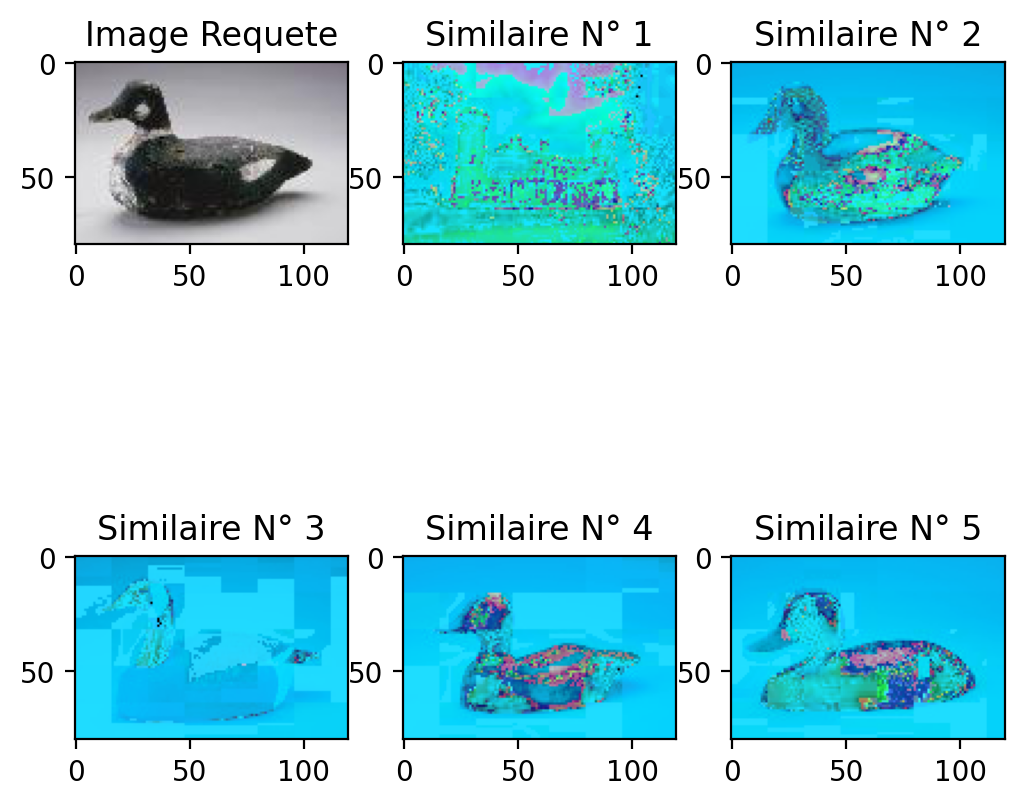

In [39]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
    ax1 = fig.add_subplot(2, 3, i+2)
    ax1.imshow(loaded_images[arraydistance[i]])
    ax1.set_title('Similaire N° %s' %(i+1))